In [9]:
import pandas as pd
from pyecharts.charts import Line
from pyecharts import options as opts

# Define file path and sheet names
file_path = 'C:\\Users\\Jiacheng Zheng\\Downloads\\report_dataset.xlsx'
sheets = ['FDI-INA-CHN', 'unemployment-IND-CHN']

# Read the first three columns from each sheet
data_fdi = pd.read_excel(file_path, sheet_name=sheets[0], usecols=[0, 1, 2])
data_unemployment = pd.read_excel(file_path, sheet_name=sheets[1], usecols=[0, 1, 2])

# Drop rows with NaN values
data_fdi.dropna(inplace=True)
data_unemployment.dropna(inplace=True)

# Create a line chart for FDI data
line_fdi = (
    Line()
    .add_xaxis(data_fdi['Year'].astype(str).tolist())
    .add_yaxis("China", data_fdi['China'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("India", data_fdi['India'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="FDI: China vs India"),
        xaxis_opts=opts.AxisOpts(name="Year"),
        yaxis_opts=opts.AxisOpts(name="FDI")
    )
)

# Create a line chart for Unemployment data
line_unemployment = (
    Line()
    .add_xaxis(data_unemployment['Year'].astype(str).tolist())
    .add_yaxis("China", data_unemployment['China'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("India", data_unemployment['India'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Unemployment: China vs India"),
        xaxis_opts=opts.AxisOpts(name="Year"),
        yaxis_opts=opts.AxisOpts(name="Unemployment Rate")
    )
)

# Render the charts
line_fdi.render('fdi_comparison.html')
line_unemployment.render('unemployment_comparison.html')


'C:\\Users\\Jiacheng Zheng\\Documents\\Jupyter code\\Prof.Li\\unemployment_comparison.html'

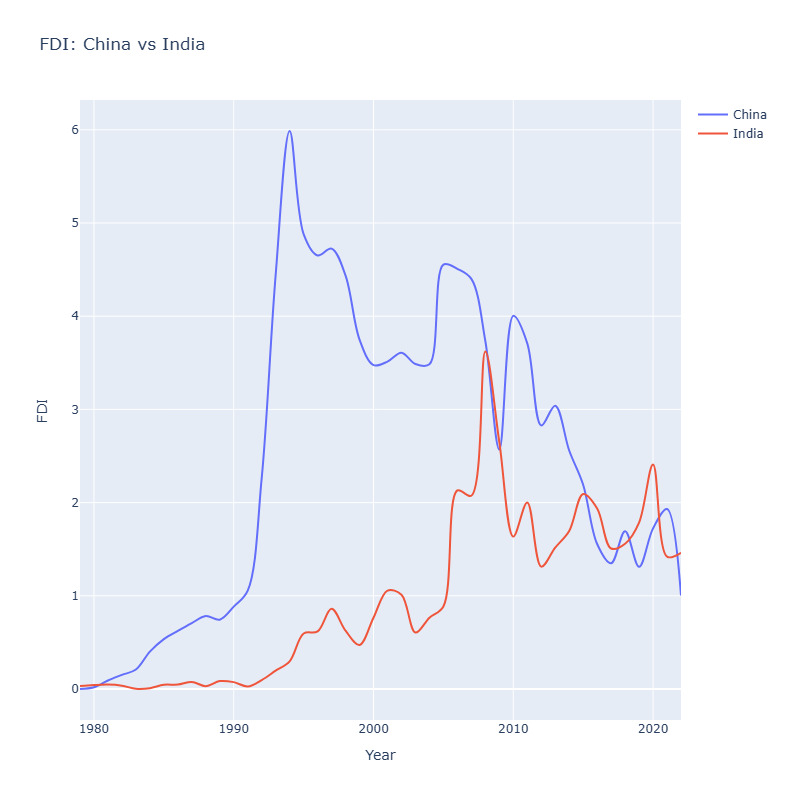

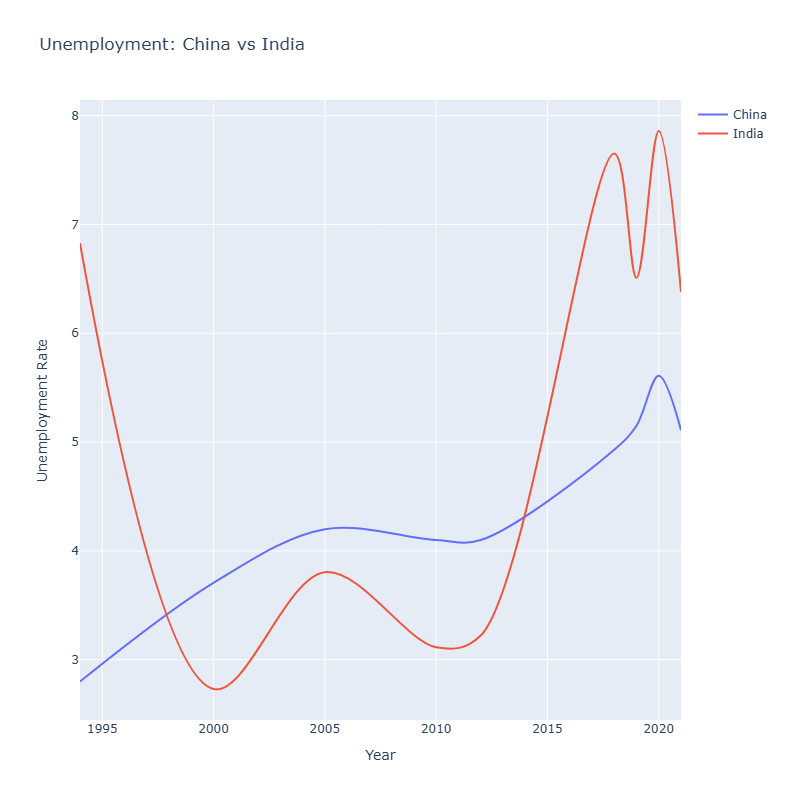

In [8]:
import pandas as pd
import plotly.graph_objects as go

# Define file path and sheet names
file_path = 'C:\\Users\\Jiacheng Zheng\\Downloads\\report_dataset.xlsx'
sheets = ['FDI-INA-CHN', 'unemployment-IND-CHN']

# Read the first three columns from each sheet
data_fdi = pd.read_excel(file_path, sheet_name=sheets[0], usecols=[0, 1, 2])
data_unemployment = pd.read_excel(file_path, sheet_name=sheets[1], usecols=[0, 1, 2])

# Drop rows with NaN values
data_fdi.dropna(inplace=True)
data_unemployment.dropna(inplace=True)

# Create a line chart for FDI data
fig_fdi = go.Figure()

fig_fdi.add_trace(go.Scatter(
    x=data_fdi['Year'],
    y=data_fdi['China'],
    mode='lines',
    name='China',
    line_shape='spline'
))

fig_fdi.add_trace(go.Scatter(
    x=data_fdi['Year'],
    y=data_fdi['India'],
    mode='lines',
    name='India',
    line_shape='spline'
))

fig_fdi.update_layout(
    title='FDI: China vs India',
    xaxis_title='Year',
    yaxis_title='FDI',
    showlegend=True
)

# Create a line chart for Unemployment data
fig_unemployment = go.Figure()

fig_unemployment.add_trace(go.Scatter(
    x=data_unemployment['Year'],
    y=data_unemployment['China'],
    mode='lines',
    name='China',
    line_shape='spline'
))

fig_unemployment.add_trace(go.Scatter(
    x=data_unemployment['Year'],
    y=data_unemployment['India'],
    mode='lines',
    name='India',
    line_shape='spline'
))

fig_unemployment.update_layout(
    title='Unemployment: China vs India',
    xaxis_title='Year',
    yaxis_title='Unemployment Rate',
    showlegend=True
)


# Update layout for FDI chart
fig_fdi.update_layout(
    title='FDI: China vs India',
    xaxis_title='Year',
    yaxis_title='FDI',
    showlegend=True,
    width=1600,  # Set the width of the chart
    height=800  # Set the height of the chart
)

# Update layout for Unemployment chart
fig_unemployment.update_layout(
    title='Unemployment: China vs India',
    xaxis_title='Year',
    yaxis_title='Unemployment Rate',
    showlegend=True,
    width=1600,  # Set the width of the chart
    height=800  # Set the height of the chart
)

# Render the charts
fig_fdi.show()
fig_unemployment.show()


# Render the charts to HTML files
fig_fdi.write_html('fdi_comparison.html')
fig_unemployment.write_html('unemployment_comparison.html')



In [5]:
import pandas as pd
from pyecharts.charts import Line
from pyecharts import options as opts

# Define file path and sheet names
file_path = 'C:\\Users\\Jiacheng Zheng\\Downloads\\report_dataset.xlsx'
sheets = ['FDI-INA-CHN', 'unemployment-IND-CHN']

# Read the first five columns from each sheet (including the prediction columns)
data_fdi = pd.read_excel(file_path, sheet_name=sheets[0], usecols=[0, 1, 2, 3, 4])
data_unemployment = pd.read_excel(file_path, sheet_name=sheets[1], usecols=[0, 1, 2, 3, 4])

# Drop rows with NaN values for actual data columns
data_fdi.dropna(subset=['Year', 'China', 'India'], inplace=True)
data_unemployment.dropna(subset=['Year', 'China', 'India'], inplace=True)

# Get the list of years and ensure it covers the full range of actual and predicted data
years_fdi = data_fdi['Year'].astype(str).tolist()
years_unemployment = data_unemployment['Year'].astype(str).tolist()

# Extend years to cover prediction data if necessary
max_year_fdi = data_fdi['Year'].max()
if len(data_fdi) < len(data_fdi.dropna(subset=['PRE_China'])):
    years_fdi.extend(
        data_fdi.loc[len(years_fdi):, 'Year'].dropna().astype(str).tolist()
    )

max_year_unemployment = data_unemployment['Year'].max()
if len(data_unemployment) < len(data_unemployment.dropna(subset=['PRE_China'])):
    years_unemployment.extend(
        data_unemployment.loc[len(years_unemployment):, 'Year'].dropna().astype(str).tolist()
    )

# Create a line chart for FDI data
line_fdi = (
    Line()
    .add_xaxis(years_fdi)
    .add_yaxis("China", data_fdi['China'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("India", data_fdi['India'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("PRE_China", data_fdi['PRE_China'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(type_='dashed'), label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("PRE_India", data_fdi['PRE_India'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(type_='dashed'), label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="FDI: China vs India"),
        xaxis_opts=opts.AxisOpts(name="Year"),
        yaxis_opts=opts.AxisOpts(name="FDI")
    )
)

# Create a line chart for Unemployment data
line_unemployment = (
    Line()
    .add_xaxis(years_unemployment)
    .add_yaxis("China", data_unemployment['China'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("India", data_unemployment['India'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("PRE_China", data_unemployment['PRE_China'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(type_='dashed'), label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("PRE_India", data_unemployment['PRE_India'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(type_='dashed'), label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Unemployment: China vs India"),
        xaxis_opts=opts.AxisOpts(name="Year"),
        yaxis_opts=opts.AxisOpts(name="Unemployment Rate")
    )
)

# Render the charts
line_fdi.render('PRE_fdi_comparison.html')
line_unemployment.render('PRE_unemployment_comparison.html')


'C:\\Users\\Jiacheng Zheng\\Documents\\Jupyter code\\PRE_unemployment_comparison.html'

In [6]:
import pandas as pd
from pyecharts.charts import Line
from pyecharts import options as opts

# Define file path and sheet names
file_path = 'C:\\Users\\Jiacheng Zheng\\Downloads\\report_dataset.xlsx'
sheets = ['FDI-INA-CHN', 'unemployment-IND-CHN']

# Read the first five columns from each sheet (including the prediction columns)
data_fdi = pd.read_excel(file_path, sheet_name=sheets[0], usecols=[0, 1, 2, 3, 4])
data_unemployment = pd.read_excel(file_path, sheet_name=sheets[1], usecols=[0, 1, 2, 3, 4])

# Drop rows with NaN values for actual data columns
data_fdi.dropna(subset=['Year', 'China', 'India'], inplace=True)
data_unemployment.dropna(subset=['Year', 'China', 'India'], inplace=True)

# Get the list of years and ensure it covers the full range of actual and predicted data
years_fdi = data_fdi['Year'].astype(str).tolist()
years_unemployment = data_unemployment['Year'].astype(str).tolist()

# Extend years to cover prediction data if necessary
max_year_fdi = data_fdi['Year'].max()
if len(data_fdi) < len(data_fdi.dropna(subset=['PRE_China'])):
    years_fdi.extend(
        data_fdi.loc[len(years_fdi):, 'Year'].dropna().astype(str).tolist()
    )

max_year_unemployment = data_unemployment['Year'].max()
if len(data_unemployment) < len(data_unemployment.dropna(subset=['PRE_China'])):
    years_unemployment.extend(
        data_unemployment.loc[len(years_unemployment):, 'Year'].dropna().astype(str).tolist()
    )

# Create a line chart for FDI data
line_fdi = (
    Line()
    .add_xaxis(years_fdi)
    .add_yaxis("China", data_fdi['China'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("India", data_fdi['India'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("PRE_China", data_fdi['PRE_China'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(type_='dashed'), label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("PRE_India", data_fdi['PRE_India'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(type_='dashed'), label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="FDI: China vs India"),
        xaxis_opts=opts.AxisOpts(name="Year"),
        yaxis_opts=opts.AxisOpts(name="FDI")
    )
)

# Create a line chart for Unemployment data
line_unemployment = (
    Line()
    .add_xaxis(years_unemployment)
    .add_yaxis("China", data_unemployment['China'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("India", data_unemployment['India'].tolist(), is_smooth=True, label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("PRE_China", data_unemployment['PRE_China'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(type_='dashed'), label_opts=opts.LabelOpts(is_show=False))
    .add_yaxis("PRE_India", data_unemployment['PRE_India'].tolist(), is_smooth=True, linestyle_opts=opts.LineStyleOpts(type_='dashed'), label_opts=opts.LabelOpts(is_show=False))
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Unemployment: China vs India"),
        xaxis_opts=opts.AxisOpts(name="Year"),
        yaxis_opts=opts.AxisOpts(name="Unemployment Rate")
    )
)

# Render the charts
line_fdi.render('com_fdi_comparison.html')
line_unemployment.render('com_unemployment_comparison.html')


'C:\\Users\\Jiacheng Zheng\\Documents\\Jupyter code\\com_unemployment_comparison.html'